In [40]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import quandl
from datetime import datetime
import backtrader as bt
import backtrader.feeds as btfeeds
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from graham import *

quandl.ApiConfig.api_key = os.getenv('QUANDL_APY_KEY')

In [25]:
def get_trading_data(ticker, start_date, end_date):
    columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'closeunadj']
    result = quandl.get_table('SHARADAR/SEP', ticker=ticker, qopts={"columns":columns}, 
                          date={'gte': start_date, 'lte': end_date})
    result.set_index('date', inplace=True)
    result.sort_index(inplace=True)

    #df_pe = quandl.get_table('SHARADAR/DAILY', ticker=ticker, qopts={"columns":["date", "pe"]}, 
    #                          date={'gte': start_date, 'lte': end_date})
    #df_pe.set_index('date', inplace=True)
    #df_pe.sort_index(inplace=True)

    #result = pd.concat([result, df_pe], axis=1)
    return result

In [58]:
start_date = datetime(2008, 12, 31)
end_date = datetime(2019, 1, 1)

ticker1 = 'BAX' #'BAX'
df1 = get_trading_data(ticker1, start_date, end_date)
print('Quandl Sharadar/SEP data: ')
print(df1.head())
print(df1.tail())

df2 = pdr.get_data_yahoo(symbols=ticker1, start=start_date, end=end_date)
print('\nYahoo Finance data: ')
print(df2.head())
print(df2.tail())

Quandl Sharadar/SEP data: 
             open   high    low  close     volume  closeunadj
date                                                         
2008-12-31  53.02  53.96  52.59  53.59  2580300.0       53.59
2009-01-02  53.83  55.31  52.88  55.08  2936100.0       55.08
2009-01-05  54.91  54.91  53.75  54.24  3974200.0       54.24
2009-01-06  54.65  55.28  53.68  53.96  6939400.0       53.96
2009-01-07  53.31  54.30  53.08  53.84  2831100.0       53.84
             open   high    low  close     volume  closeunadj
date                                                         
2018-12-24  62.48  62.55  61.40  61.45  3202744.0       61.45
2018-12-26  61.74  64.13  61.74  64.13  4319077.0       64.13
2018-12-27  63.49  65.63  63.33  65.56  4078864.0       65.56
2018-12-28  65.84  66.00  64.97  65.21  2647704.0       65.21
2018-12-31  65.59  66.23  65.22  65.82  2230936.0       65.82

Yahoo Finance data: 
                 High        Low       Open      Close      Volume  Adj Close
Date 

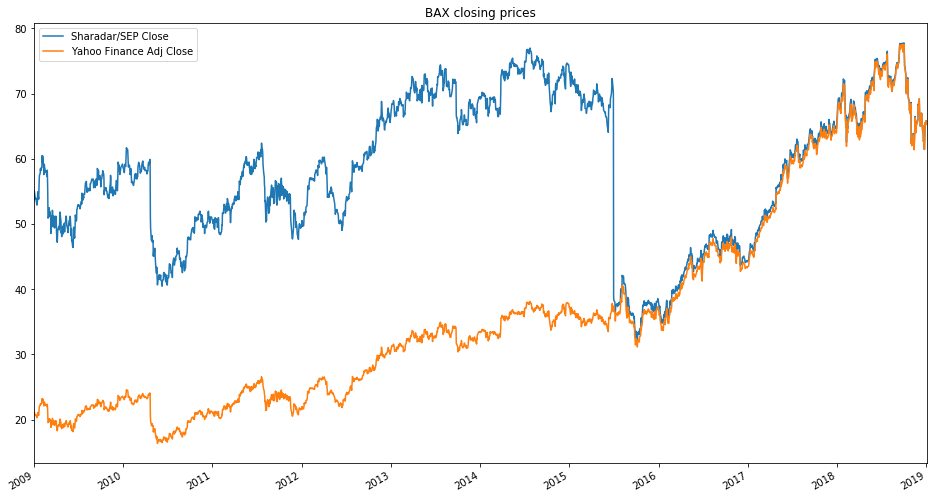

In [59]:
df1.rename(columns={"close": "Sharadar/SEP Close"}, inplace=True)
df2.rename(columns={"Adj Close": "Yahoo Finance Adj Close"}, inplace=True)
pd.concat([df1[['Sharadar/SEP Close']], df2[['Yahoo Finance Adj Close']]], 
          axis=1).plot(title=f"{ticker1} closing prices", figsize=(16, 9))

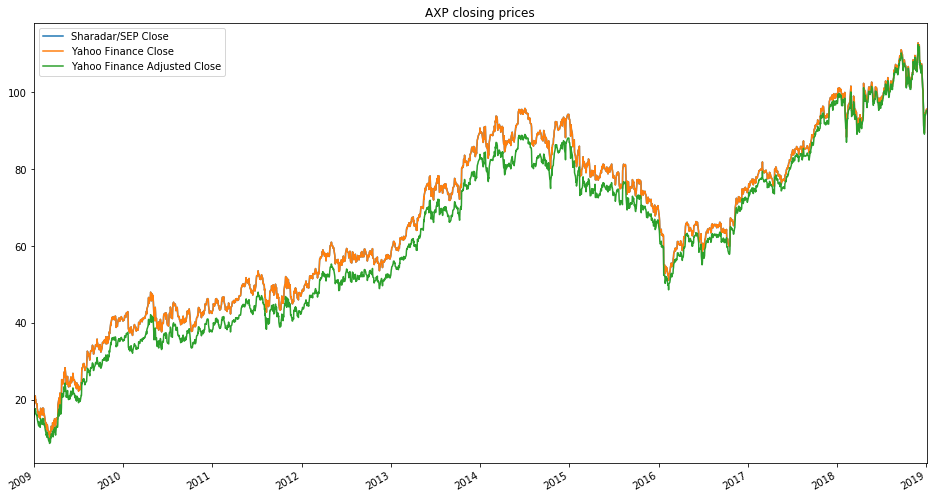

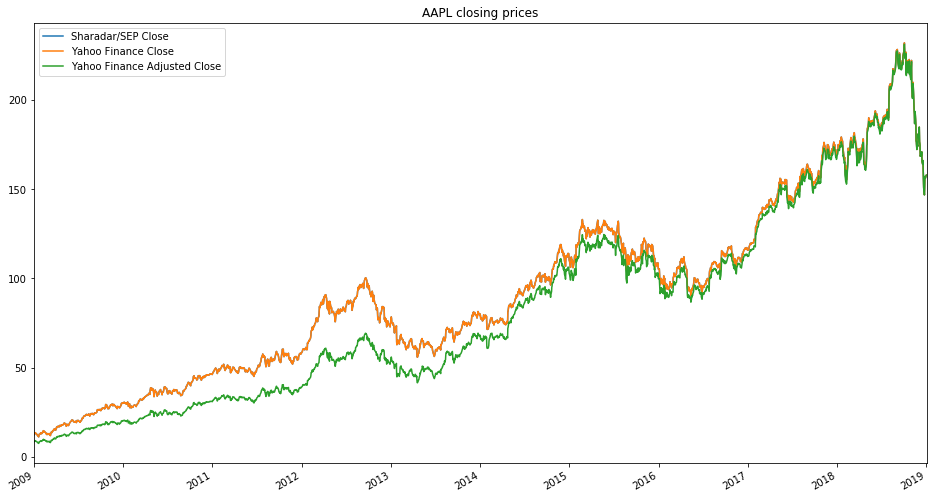

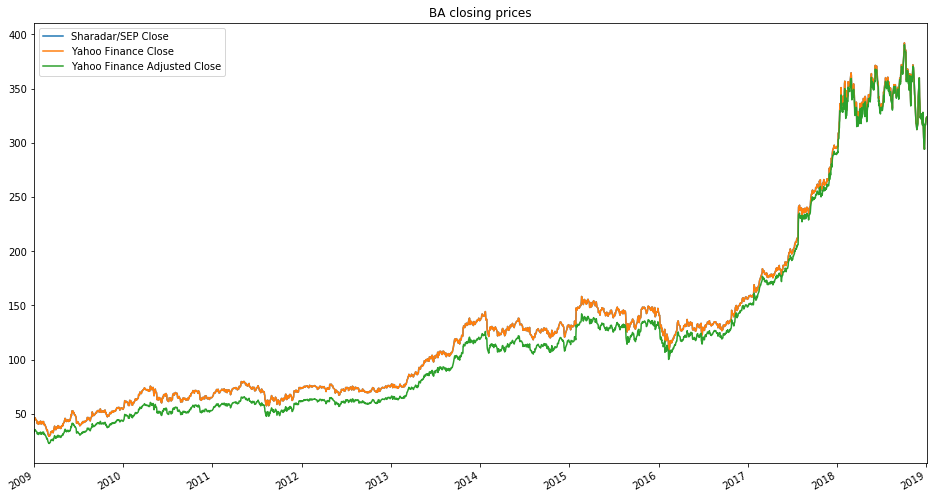

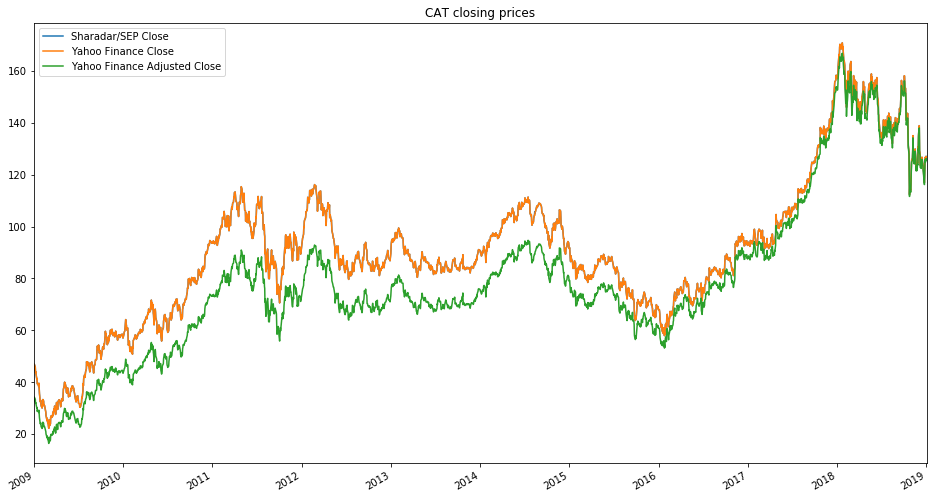

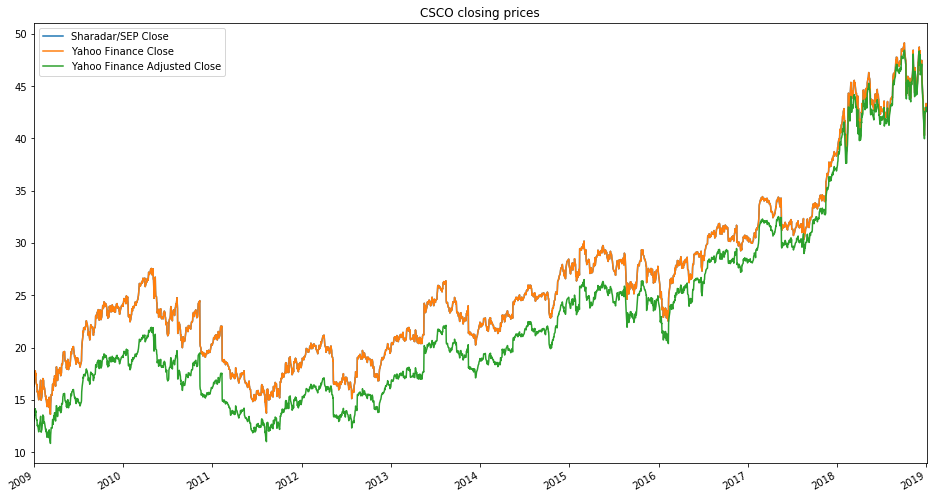

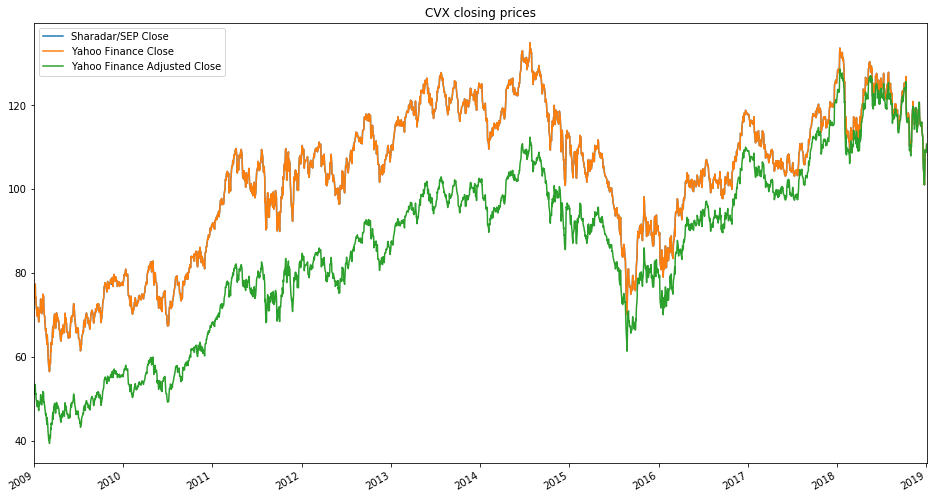

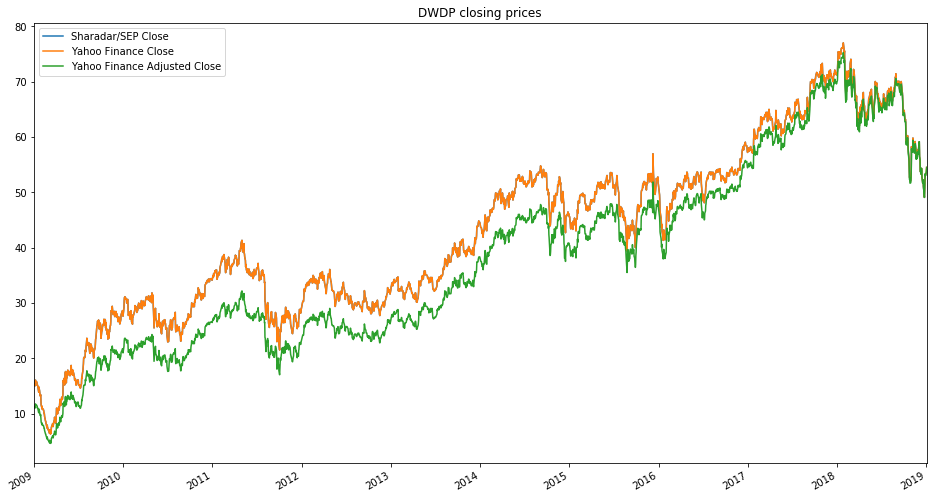

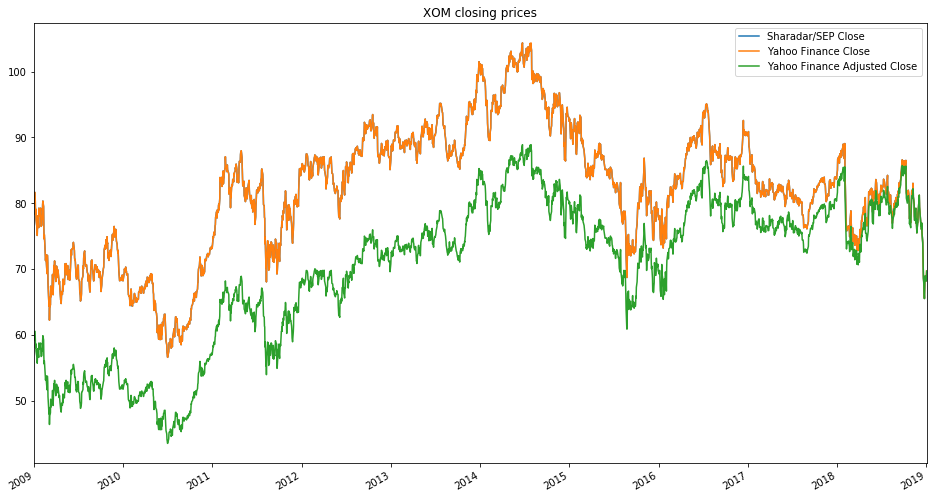

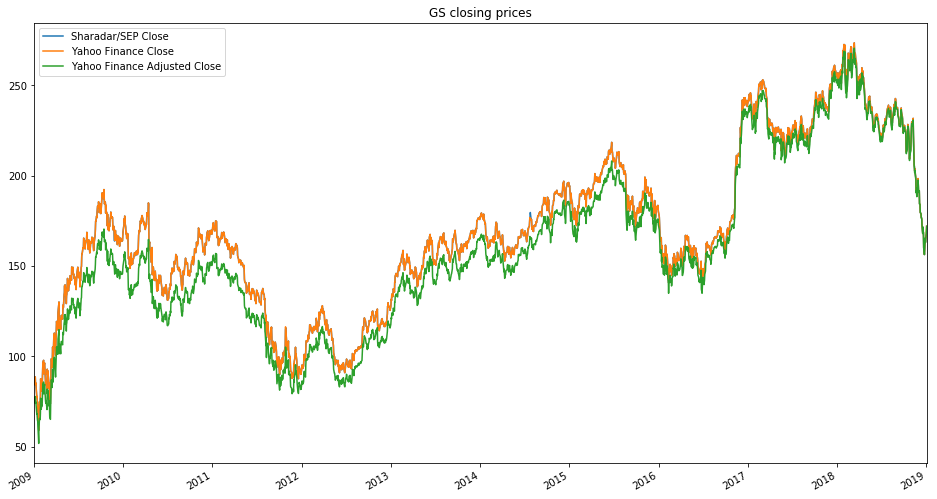

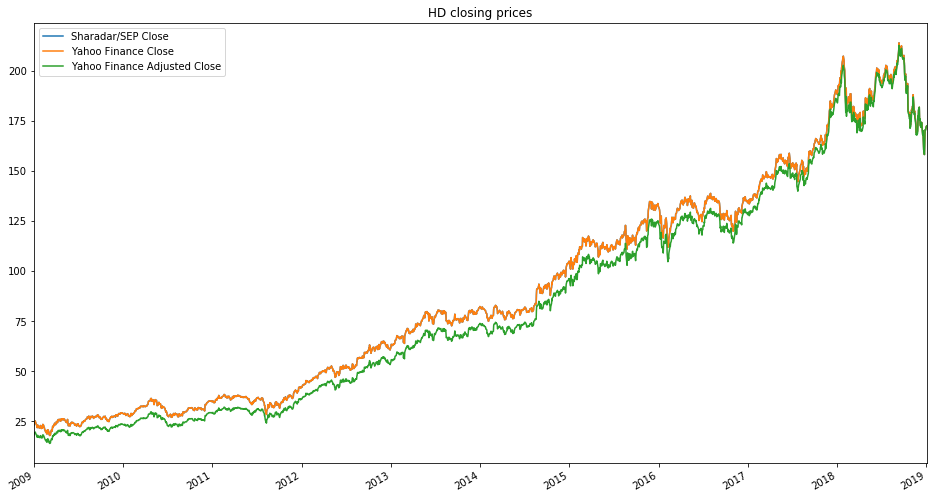

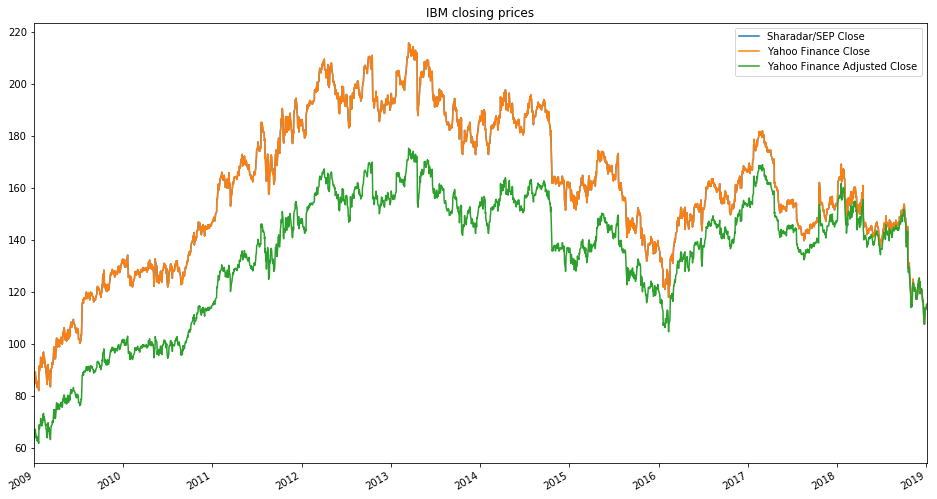

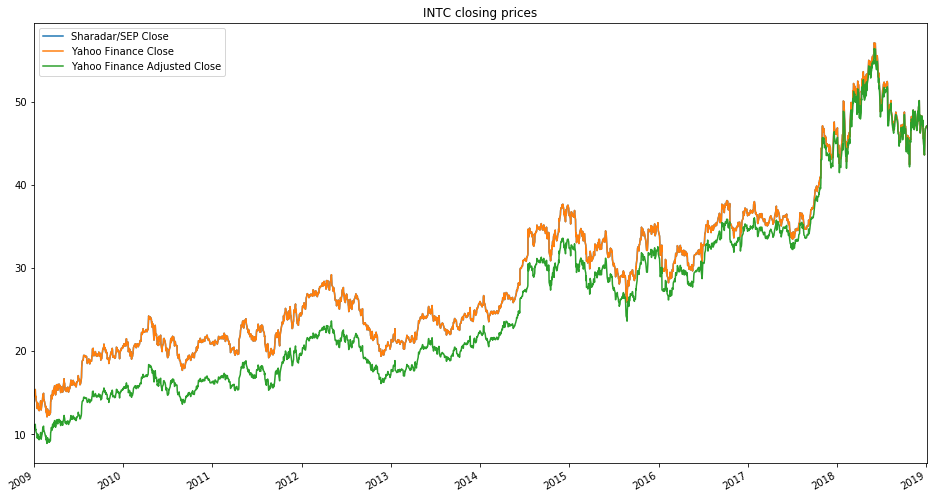

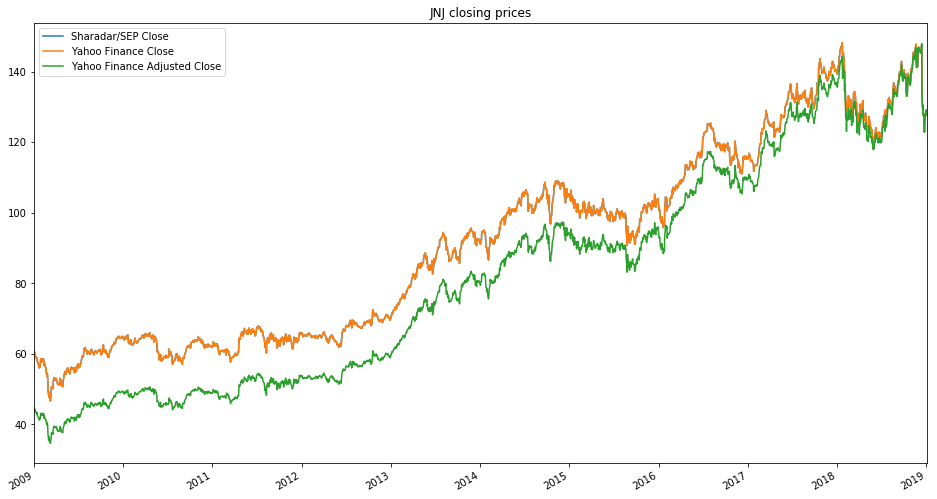

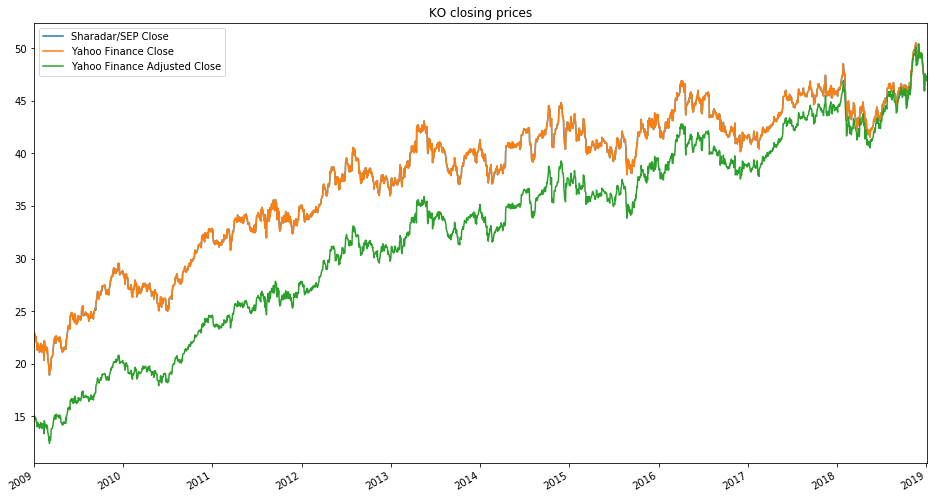

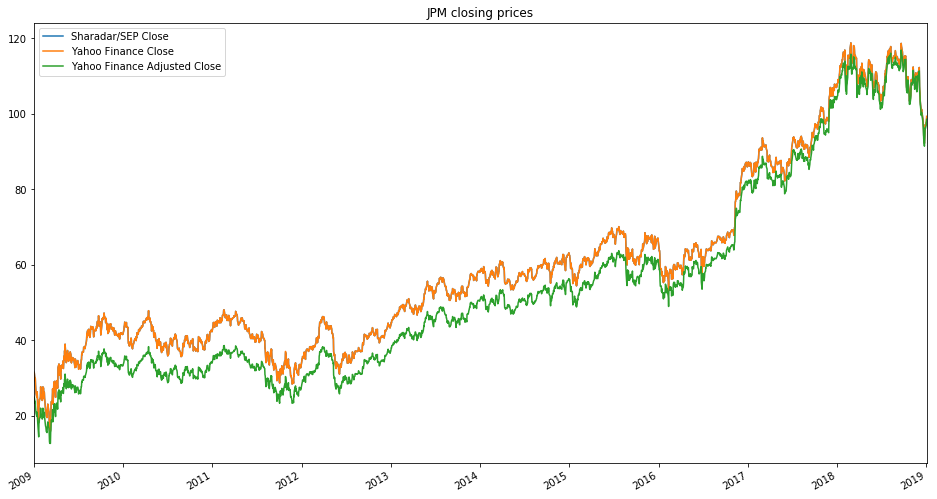

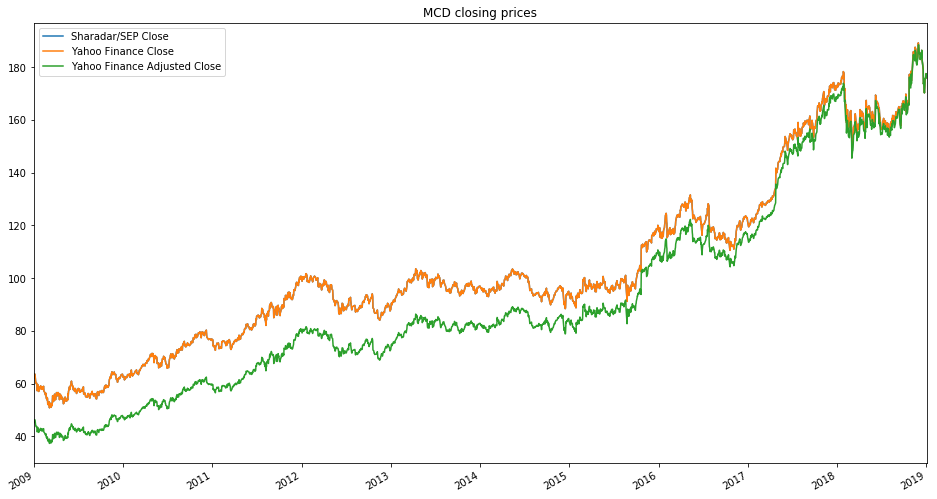

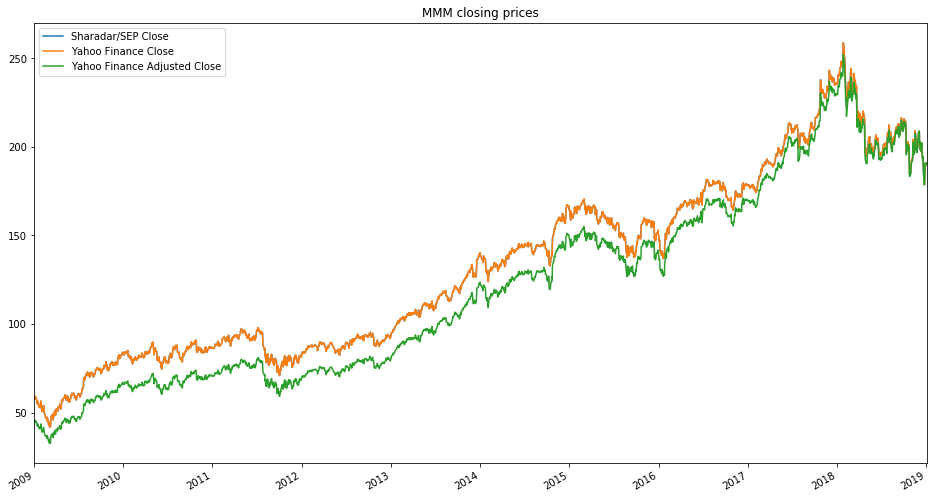

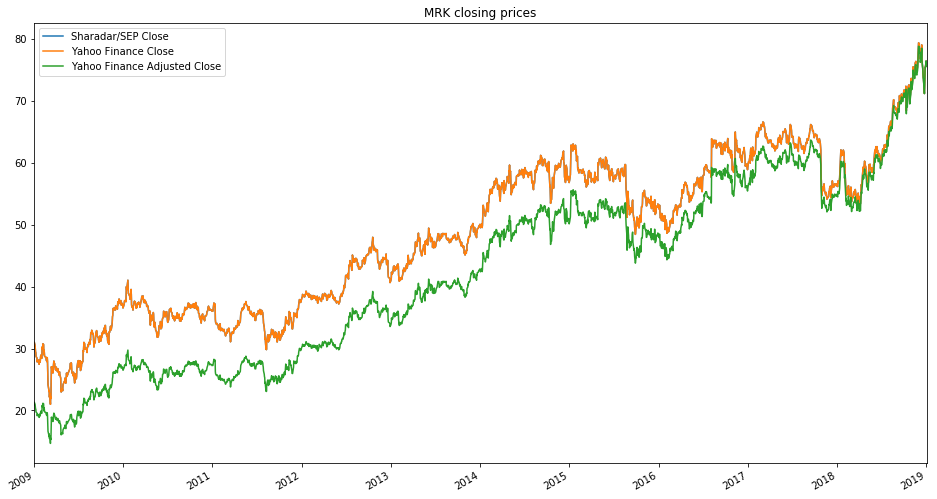

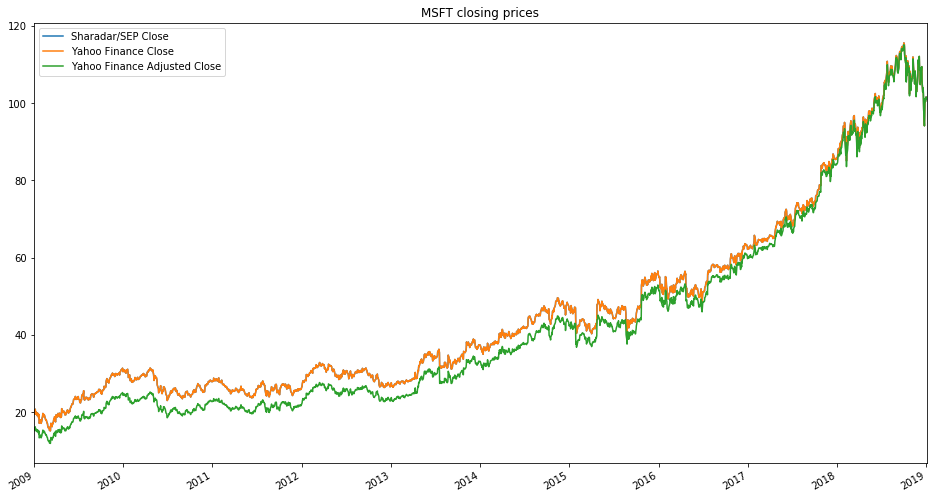

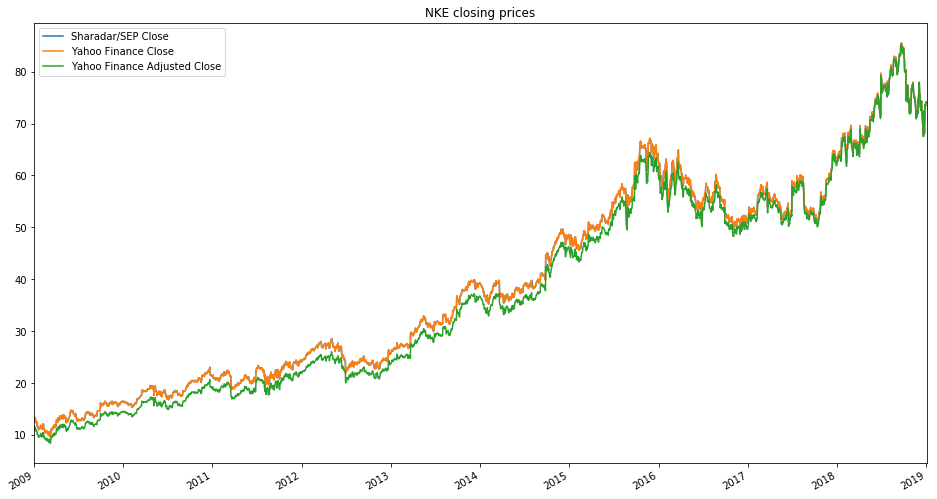

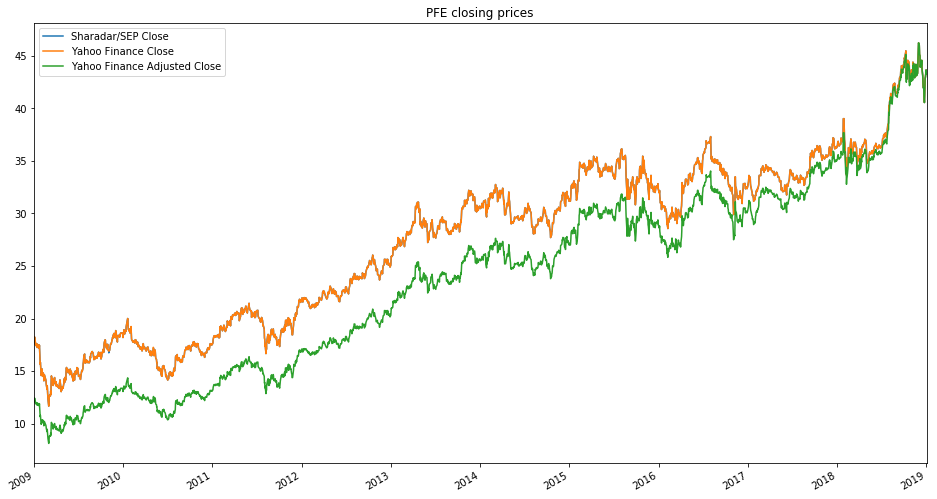

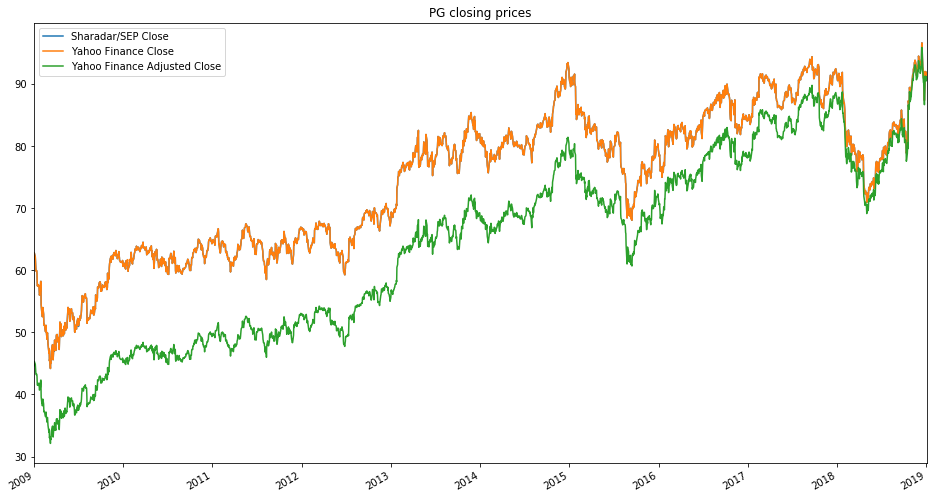

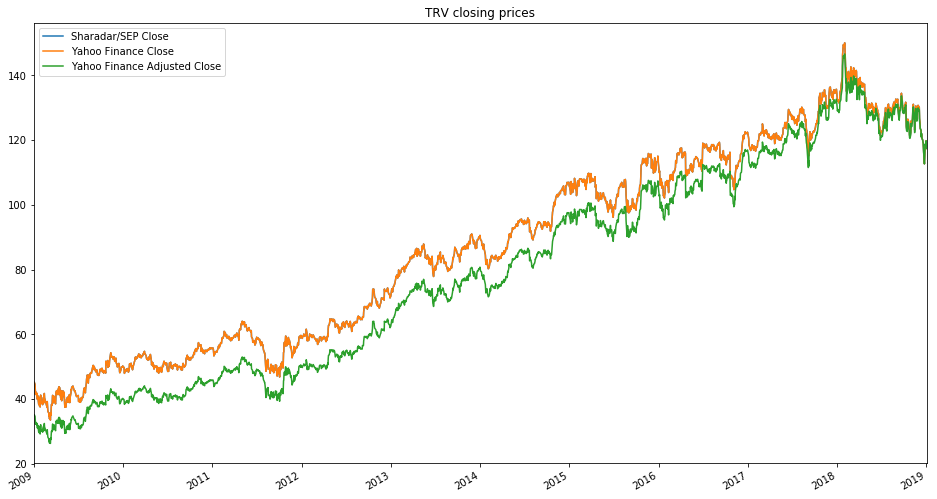

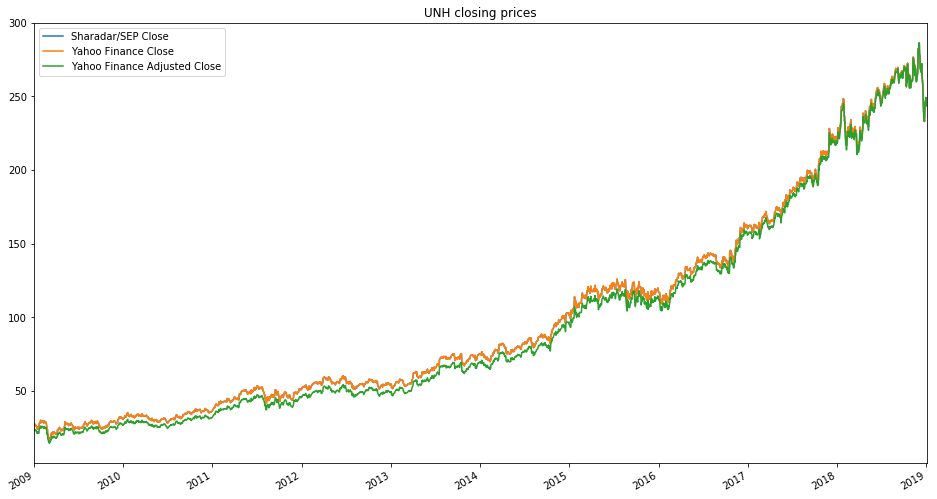

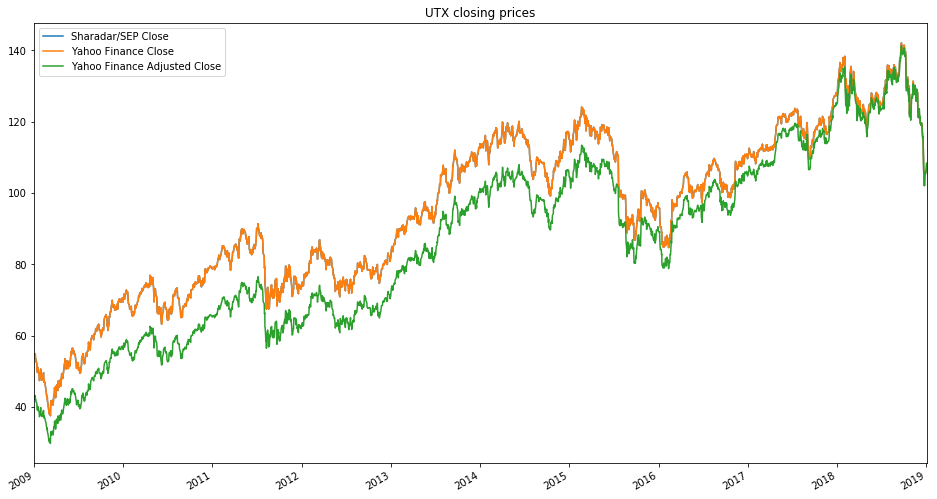

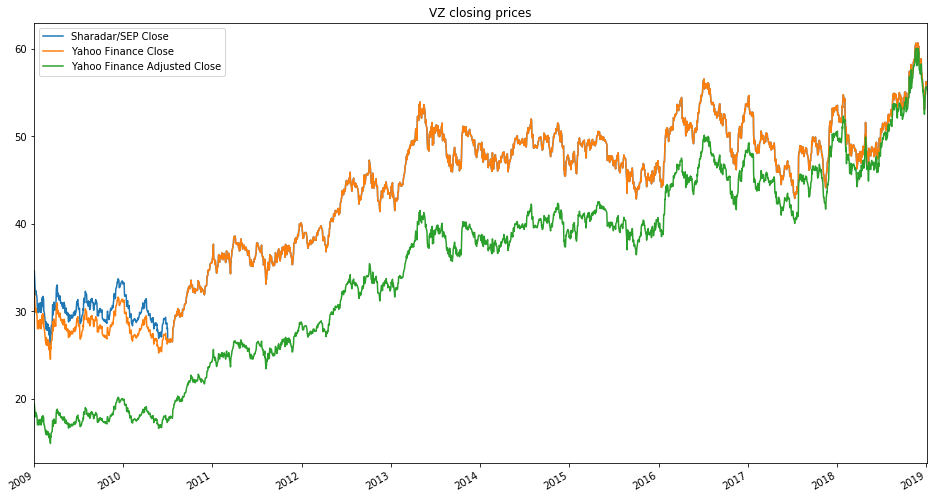

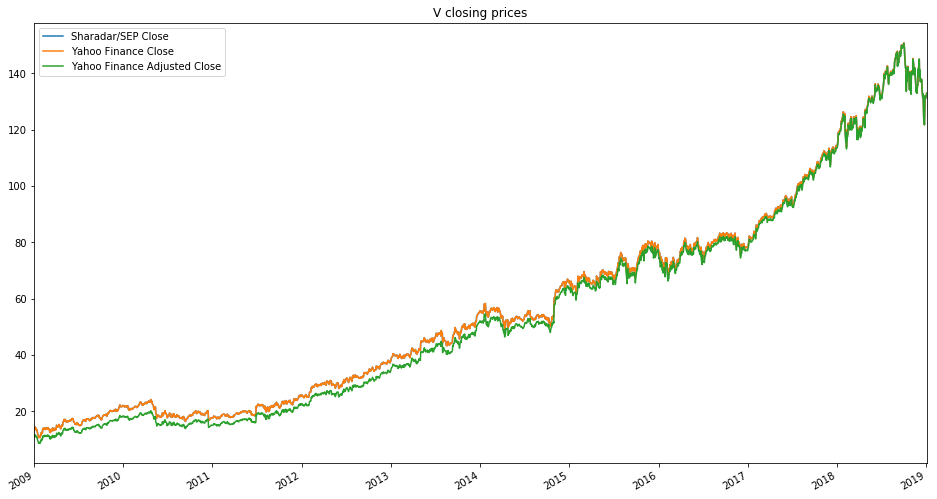

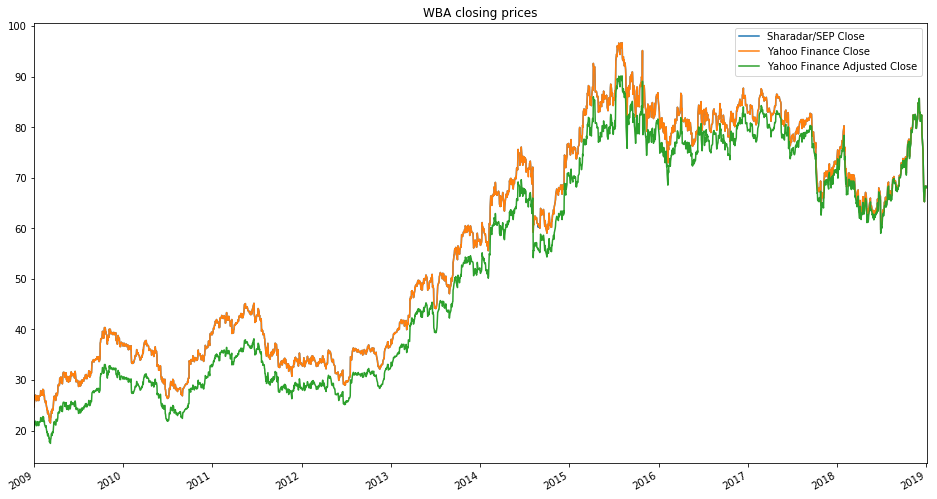

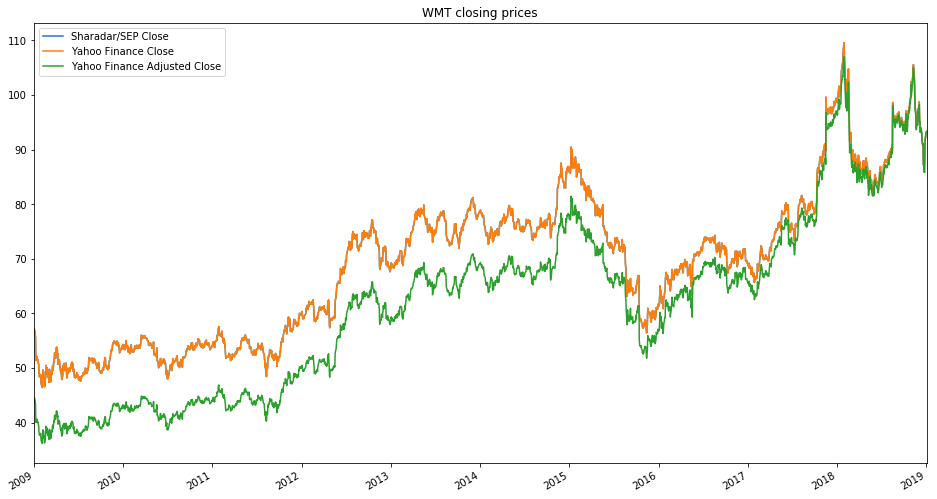

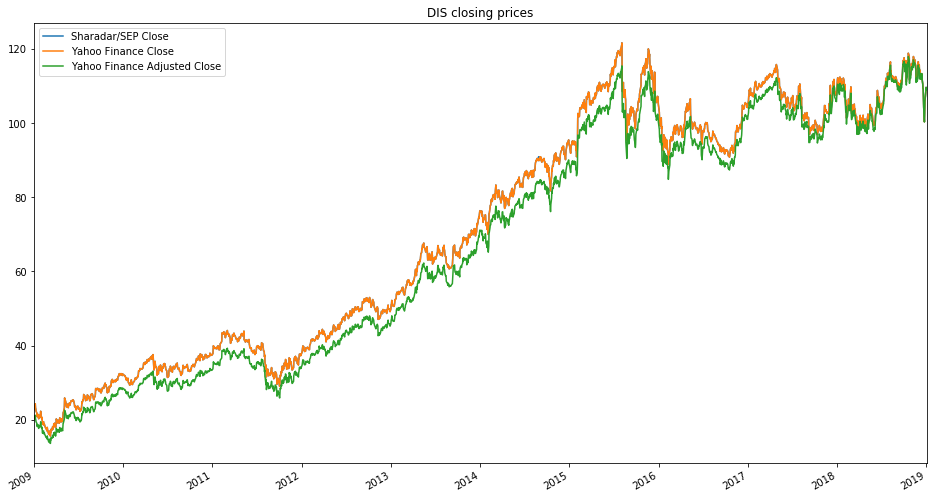

In [62]:
for ticker in get_djia_symbols():
    df1 = get_trading_data(ticker, start_date, end_date)
    #print('Quandl Sharadar/SEP data: ')
    #print(df1.head())
    #print(df1.tail())

    df2 = pdr.get_data_yahoo(symbols=ticker, start=start_date, end=end_date)
    #print('\nYahoo Finance data: ')
    #print(df2.head())
    #print(df2.tail())
    
    df1.rename(columns={"close": "Sharadar/SEP Close"}, inplace=True)
    df2.rename(columns={"Close": "Yahoo Finance Close", 
                        "Adj Close": "Yahoo Finance Adjusted Close"}, inplace=True)
    pd.concat([df1[['Sharadar/SEP Close']], df2[['Yahoo Finance Close', 'Yahoo Finance Adjusted Close']]], 
              axis=1).plot(title=f"{ticker} closing prices", figsize=(16, 9))

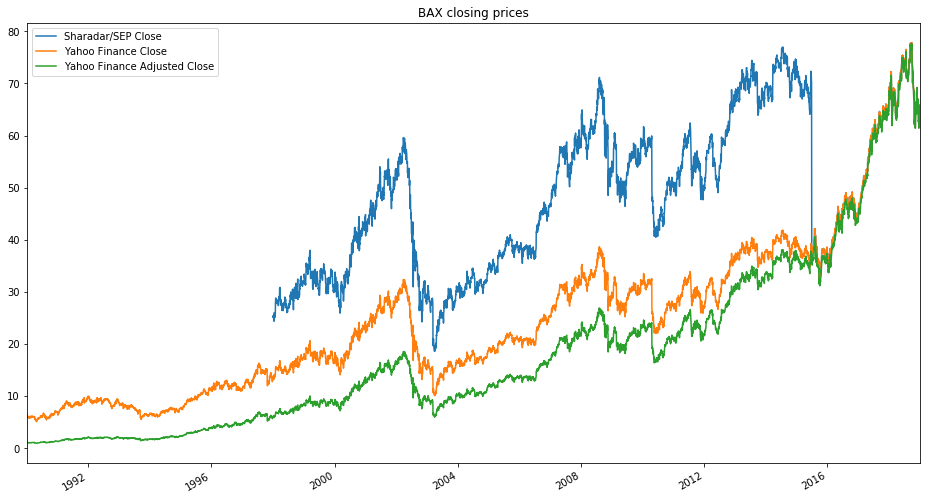

In [71]:
for ticker in ['BAX']:
    df1 = get_trading_data(ticker, datetime(1990, 1, 1), end_date)
    #print('Quandl Sharadar/SEP data: ')
    #print(df1.head())
    #print(df1.tail())

    df2 = pdr.get_data_yahoo(symbols=ticker, start=datetime(1990, 1, 1), end=end_date)
    #print('\nYahoo Finance data: ')
    #print(df2.head())
    #print(df2.tail())
    
    df1.rename(columns={"close": "Sharadar/SEP Close"}, inplace=True)
    df2.rename(columns={"Close": "Yahoo Finance Close", 
                        "Adj Close": "Yahoo Finance Adjusted Close"}, inplace=True)
    pd.concat([df1[['Sharadar/SEP Close']], df2[['Yahoo Finance Close', 'Yahoo Finance Adjusted Close']]], 
              axis=1).plot(title=f"{ticker} closing prices", figsize=(16, 9))